In [1]:
# The standard start of our notebooks
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

#  Clustering

## Data

In [2]:
# Load the data, which is included in sklearn.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target).replace(to_replace=dict(enumerate(iris.target_names)))

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object

## KMeans

Use KMeans to segment the iris data into two clusters

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)

labels = km.fit_predict(X)





In [13]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Plot each of the 2D projections to see if the clustering "makes sense"

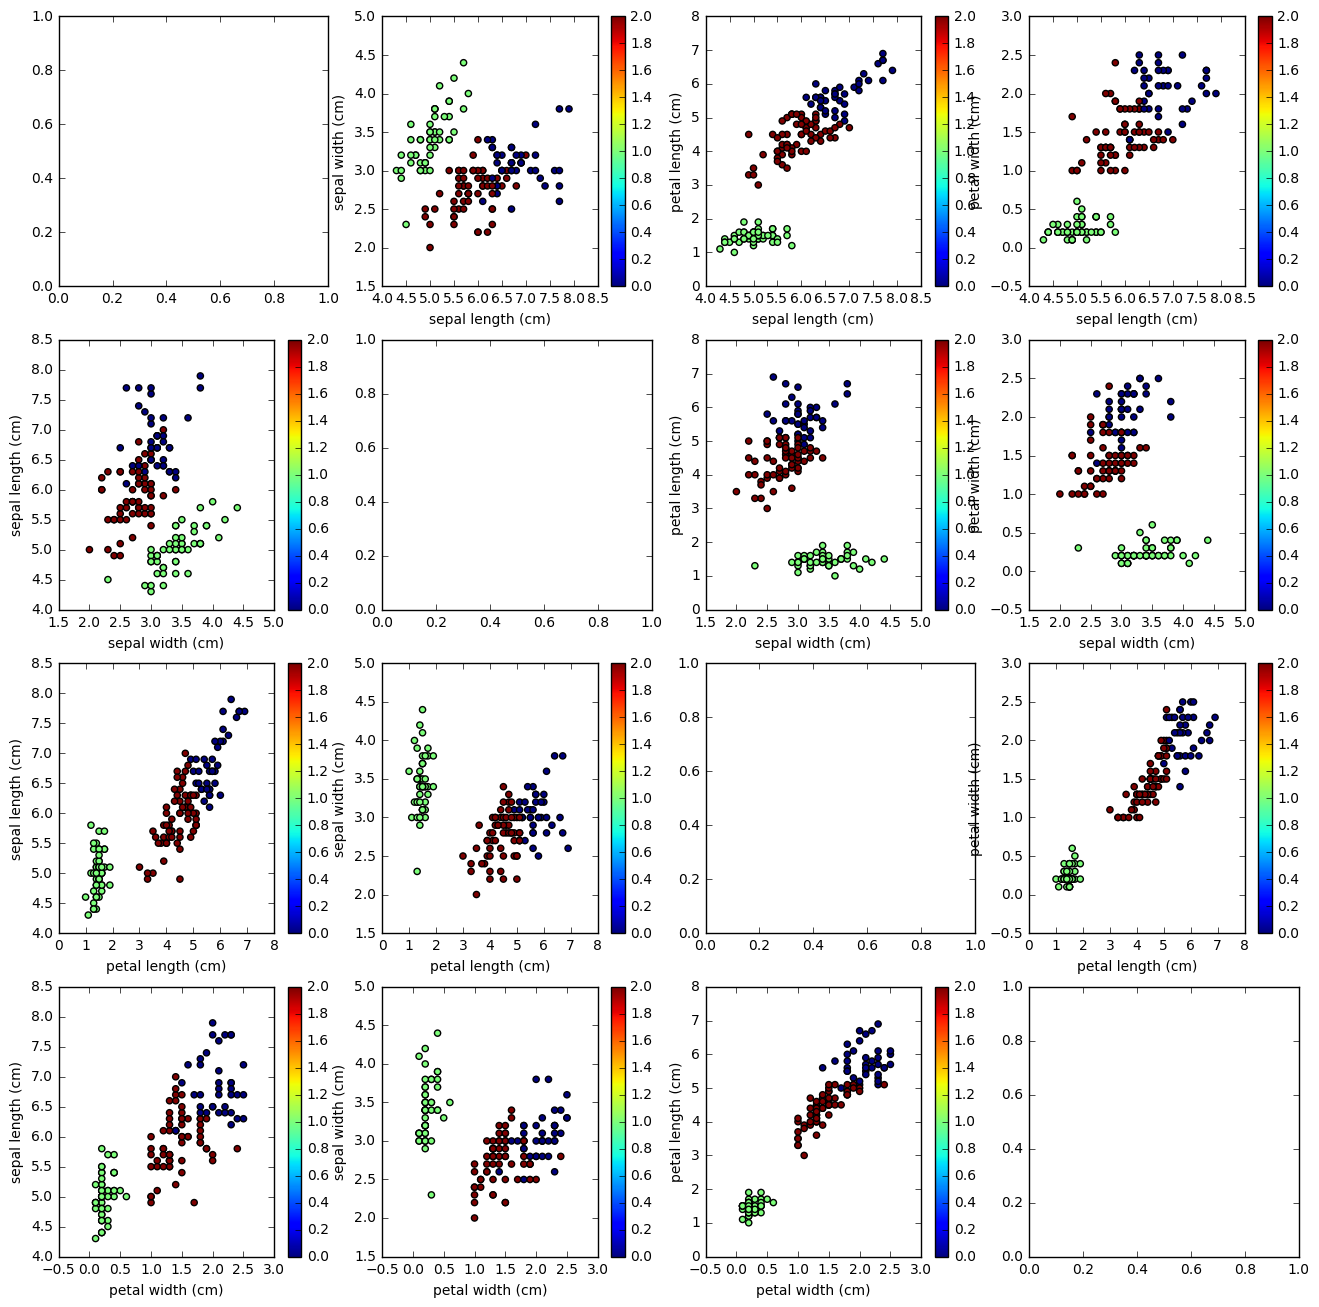

In [15]:
import matplotlib.cm as cm

fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

cmap = cm.jet
for i, f1 in enumerate(X.columns):
    for j, f2 in enumerate(X.columns):
       if not f1 == f2:
        X.plot(kind='scatter', x=f1, y=f2, c=labels, cmap=cmap, ax=axes[i, j])
        
            
plt.show()

Compare to the actual labels

In [16]:
pd.crosstab(y, labels)

col_0,0,1,2
row_0,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


Repeat the above for three or more clusters

## Pick number of clusters using scree plot

We would like to have a more data-driven approach to choosing the right number of clusters. Especially when we do not have any true labels.

### Exercise: 
(a) Plot k vs RSS for k between 1 and 10

(b) See how easily you can add a StandardScaler() step to kmeans. (That is, normalize the columns)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


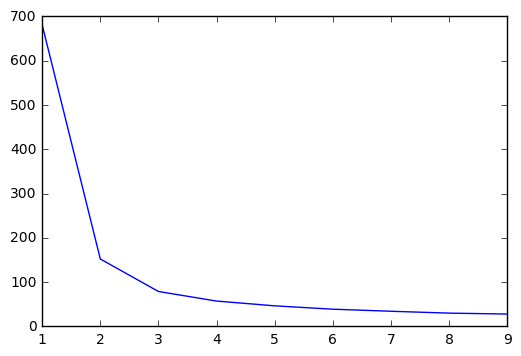

[680.82440000000042,
 152.36870647733889,
 78.940841426145937,
 57.317873214285946,
 46.535582051282461,
 38.9570111571201,
 34.293462675408627,
 30.077530998389896,
 27.992635739390273]

In [29]:
k_vals_to_try = np.arange(1,10).tolist()

RSS_scores = []

for k in k_vals_to_try:
    
    #instantiate the classifieer
    km = KMeans(n_clusters = k)

    #Fit the model
    km.fit(X)
    
    #get the residual sum of squares
    rss = -km.score(X)
    
    RSS_scores.append(rss)
    
plt.plot(k_vals_to_try, RSS_scores)
plt.show()

RSS_scores
    

## Silhouette Scores

Silhouette scores are a slightly better measure of cluster 'goodness' since they take into effect the density of each cluster as well as the distance _between_ clusters.

In [ ]:
from silhouette import silhouette_plot
from sklearn.metrics import silhouette_samples, silhouette_score



In [ ]:
clusts = range(2,10)

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

In [ ]:
for i in range(2, 7):
    clusterer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('kmeans', KMeans(i))
    ])
    silhouette_plot(X, y, clusterer, i)

## Hierarchical Clustering

Use scipy for this one

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

clusters = linkage(X, 'ward')
_ = dendrogram(clusters)

In [ ]:
labels = fcluster(clusters, 7, depth=10)

In [ ]:
pd.crosstab(y, labels)

## DBSCAN

For DBSCAN, we need to pick `min_samples` and $\epsilon$. One way to do this:

1. Fix a value of `min_samples` that makes sense.
2. Try a wide range of values for $\epsilon$ and record the number of unique labels for each one.
3. Look for a persistent number of clusters over a wide range of $\epsilon$

In [ ]:
from sklearn.cluster import DBSCAN



Pick a few representative choices for $\epsilon$ and see how the clusters compare to the true labels.